In [0]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.getcwd() + "/drive/My Drive/Colab Notebooks/lib")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/outputs/notes,subjectid,expireflag.csv")

In [4]:
df.head()

,Unnamed: 0,subject_id,text,category,expire_flag
0,0,2,Neonatology Attending Triage Note\n\nBaby [**N...,Nursing/other,0
1,2,3,PATIENT/TEST INFORMATION:\nIndication: S/P Car...,Echo,1
2,3,3,PATIENT/TEST INFORMATION:\nIndication: Pericar...,Echo,1
3,4,3,PATIENT/TEST INFORMATION:\nIndication: Left ve...,Echo,1
4,5,3,Sinus rhythm. A-V conduction delay. Slight Q-T...,ECG,1


In [0]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [6]:
df.head()

,subject_id,text,category,expire_flag
0,2,Neonatology Attending Triage Note\n\nBaby [**N...,Nursing/other,0
1,3,PATIENT/TEST INFORMATION:\nIndication: S/P Car...,Echo,1
2,3,PATIENT/TEST INFORMATION:\nIndication: Pericar...,Echo,1
3,3,PATIENT/TEST INFORMATION:\nIndication: Left ve...,Echo,1
4,3,Sinus rhythm. A-V conduction delay. Slight Q-T...,ECG,1


In [7]:
df.shape

(197297, 4)

In [8]:
df['expire_flag'].value_counts()

0    111666
1     85631
Name: expire_flag, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


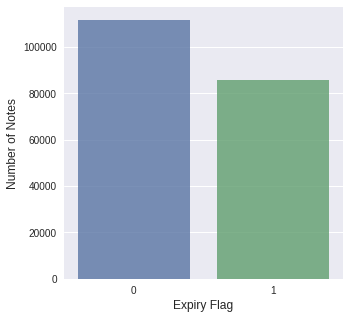

In [9]:
temp = df['expire_flag'].value_counts()

plt.figure(figsize=(5,5))
sns.barplot(temp.index, temp.values, alpha=0.8)
plt.ylabel('Number of Notes', fontsize=12)
plt.xlabel('Expiry Flag', fontsize=12)
plt.xticks()
plt.show();

In [0]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text

In [0]:
df['text'] = df['text'].apply(cleanText)

In [12]:
df.head()

,subject_id,text,category,expire_flag
0,2,neonatology attending triage note\n\nbaby [**n...,Nursing/other,0
1,3,patient/test information:\nindication: s/p car...,Echo,1
2,3,patient/test information:\nindication: pericar...,Echo,1
3,3,patient/test information:\nindication: left ve...,Echo,1
4,3,sinus rhythm. a-v conduction delay. slight q-t...,ECG,1


In [0]:
from gensim.models import doc2vec

def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the complaint narrative.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(doc2vec.TaggedDocument(v.split(), [label]))
    return labeled

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['expire_flag'], test_size=0.3, shuffle = False)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [15]:
len(all_data)

197297

In [16]:
all_data[1]

TaggedDocument(words=['patient/test', 'information:', 'indication:', 's/p', 'cardiac', 'arrest.', 'r/o', 'pericardial', 'effusion.', 'height:', '(in)', '69', 'weight', '(lb):', '150', 'bsa', '(m2):', '1.83', 'm2', 'bp', '(mm', 'hg):', '85/40', 'status:', 'inpatient', 'date/time:', '[**2101-10-21**]', 'at', '10:30', 'test:', 'portable', 'tte(complete)', 'doppler:', 'complete', 'pulse', 'and', 'color', 'flow', 'contrast:', 'none', 'technical', 'quality:', 'suboptimal', 'interpretation:', 'findings:', 'left', 'atrium:', 'the', 'left', 'atrium', 'is', 'normal', 'in', 'size.', 'right', 'atrium/interatrial', 'septum:', 'the', 'right', 'atrium', 'is', 'normal', 'in', 'size.', 'left', 'ventricle:', 'left', 'ventricular', 'wall', 'thicknesses', 'are', 'normal.', 'the', 'left', 'ventricular', 'cavity', 'size', 'is', 'normal.', 'there', 'is', 'severe', 'regional', 'left', 'ventricular', 'systolic', 'dysfunction.', 'overall', 'left', 'ventricular', 'systolic', 'function', 'is', 'severely', 'depres

In [17]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

100%|██████████| 197297/197297 [00:00<00:00, 2308932.16it/s]


In [18]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 197297/197297 [00:00<00:00, 2157048.45it/s]


CPU times: user 1h 23min 36s, sys: 1min 4s, total: 1h 24min 41s
Wall time: 44min 34s


In [0]:
model_dbow.save("/content/drive/My Drive/Colab Notebooks/models/d2v_model_dbow_grouped.doc2vec")

In [0]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors

In [0]:
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [22]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(multi_class='multinomial', solver = 'lbfgs')
logreg.fit(train_vectors_dbow, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
logreg.score(test_vectors_dbow, y_test)

0.7493664470349721